In [6]:
import pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import pickle

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [41]:
sklearn.__version__

'1.3.2'

In [7]:
train_df = pd.read_csv('task_train.csv')
test_df = pd.read_csv('task_test.csv')

In [8]:
train_df.head()

,Unnamed: 0.1,Unnamed: 0,ID,UserID,Origin,Destination,Time,Income,Comment,Created_at,Label
0,0,0,1001034,1001513,1030,1030,9,230000,\n,2024-04-13 10:07:38.022905,0
1,1,1,1005544,1001129,631,847,42,1060000,راننده بسیار مودب بود و خوشرو بود\n,2024-04-15 12:15:10.609723,0
2,2,2,1000139,1004333,858,864,34,1250000,سفر بسیار اسان و راحتی بود، و ماشین تمیزتمیز ...,2024-04-13 02:18:36.600126,0
3,3,3,1000560,1001673,593,846,14,660000,راننده به موقع رسید\n,2024-04-13 06:00:18.870376,1
4,4,4,1008230,1002231,1018,1018,11,230000,ماشین بسیار شیک بود و راننده از هر لحاظ حرفه...,2024-04-16 16:31:47.874442,0


In [9]:
test_df.head()

,Unnamed: 0.1,Unnamed: 0,ID,UserID,Origin,Destination,Time,Income,Comment,Created_at,Label
0,0,0,1008520,1003983,631,1068,76,3450000,قابل اعتماد و حرفهای\n,2024-04-13 03:18:20.374006,0
1,1,1,1009643,1003594,611,862,16,560000,عالی\n,2024-04-16 02:53:36.484247,0
2,2,2,1008644,1003679,1018,618,40,1140000,ضعیف\n,2024-04-13 09:43:47.217599,0
3,3,3,1009012,1004158,602,842,18,750000,خوب\n,2024-04-14 09:29:33.465792,0
4,4,4,1009925,1003757,589,602,33,760000,افتضاح\n,2024-04-16 15:59:35.316854,0


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  8500 non-null   int64 
 1   Unnamed: 0    8500 non-null   int64 
 2   ID            8500 non-null   int64 
 3   UserID        8500 non-null   int64 
 4   Origin        8500 non-null   int64 
 5   Destination   8500 non-null   int64 
 6   Time          8500 non-null   int64 
 7   Income        8500 non-null   int64 
 8   Comment       8500 non-null   object
 9   Created_at    8500 non-null   object
 10  Label         8500 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 730.6+ KB


# Check the labels balancement

In [11]:
Counter(train_df['Label'].tolist())

Counter({0: 8311, 1: 189})

In [12]:
train_df['Comment'].tolist()[100]

'راننده هیچ توجهی به تمیز کردن ماشین نداشت\n'

In [13]:
train_df['Label'].tolist()[100]

0

# Convert continuous columns to categorical format

In [14]:
label_encoder = LabelEncoder()
n_bins_income = 30
n_bins_time = 10

train_df['C_Income'] = label_encoder.fit_transform(pd.cut(train_df['Income'], n_bins_income, retbins=True)[0])
test_df['C_Income'] = label_encoder.fit_transform(pd.cut(test_df['Income'], n_bins_income, retbins=True)[0])

train_df['C_Time'] = label_encoder.fit_transform(pd.cut(train_df['Time'], n_bins_time, retbins=True)[0])
test_df['C_Time'] = label_encoder.fit_transform(pd.cut(test_df['Time'], n_bins_time, retbins=True)[0])

le = LabelEncoder()
le.fit(train_df['UserID'].tolist()+test_df['UserID'].tolist())
train_df['C_UID'] = le.transform(train_df['UserID'])
test_df['C_UID'] = le.transform(test_df['UserID'])

In [15]:
train_df

,Unnamed: 0.1,Unnamed: 0,ID,UserID,Origin,Destination,Time,Income,Comment,Created_at,Label,C_Income,C_Time,C_UID
0,0,0,1001034,1001513,1030,1030,9,230000,\n,2024-04-13 10:07:38.022905,0,0,0,1054
1,1,1,1005544,1001129,631,847,42,1060000,راننده بسیار مودب بود و خوشرو بود\n,2024-04-15 12:15:10.609723,0,7,3,792
2,2,2,1000139,1004333,858,864,34,1250000,سفر بسیار اسان و راحتی بود، و ماشین تمیزتمیز ...,2024-04-13 02:18:36.600126,0,8,2,3380
3,3,3,1000560,1001673,593,846,14,660000,راننده به موقع رسید\n,2024-04-13 06:00:18.870376,1,3,1,1166
4,4,4,1008230,1002231,1018,1018,11,230000,ماشین بسیار شیک بود و راننده از هر لحاظ حرفه...,2024-04-16 16:31:47.874442,0,0,0,1570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,8495,8495,1008378,1002173,846,608,31,770000,در خودروی ایشان برای مسافران کتاب جهت مطالعه و...,2024-04-16 18:23:52.969318,0,4,2,1530
8496,8496,8496,1006567,1003500,839,582,22,1110000,خیلی خوشحالم که این راننده مرا میبرد\n,2024-04-16 03:53:18.490703,0,7,1,2547
8497,8497,8497,1000341,1004087,1029,1030,7,420000,فوق العاده بود\n,2024-04-13 04:17:50.174425,0,1,0,3134
8498,8498,8498,1005068,1001042,602,611,15,590000,هیچ شکایتی ندارم، اما هیچ نظر مثبتی هم ندارم\n,2024-04-15 08:55:47.112620,0,3,1,734


# Feature Selection

In [16]:
train_df_cat = train_df[['ID', 'C_UID', 'Origin', 'Destination', 'C_Time', 'C_Income', 'Label']]
test_df_cat = test_df[['ID', 'C_UID', 'Origin', 'Destination', 'C_Time', 'C_Income', 'Label']]

train_df_cat

,ID,C_UID,Origin,Destination,C_Time,C_Income,Label
0,1001034,1054,1030,1030,0,0,0
1,1005544,792,631,847,3,7,0
2,1000139,3380,858,864,2,8,0
3,1000560,1166,593,846,1,3,1
4,1008230,1570,1018,1018,0,0,0
...,...,...,...,...,...,...,...
8495,1008378,1530,846,608,2,4,0
8496,1006567,2547,839,582,1,7,0
8497,1000341,3134,1029,1030,0,1,0
8498,1005068,734,602,611,1,3,0


In [17]:
X_train = train_df_cat[['ID', 'C_UID', 'Origin', 'Destination', 'C_Time', 'C_Income']]
X_test = test_df_cat[['ID', 'C_UID', 'Origin', 'Destination', 'C_Time', 'C_Income']]

y_train = train_df_cat['Label']
y_test = test_df_cat['Label']

# Chi square

In [18]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 21.319972
Feature 1: 234.913497
Feature 2: 5.061466
Feature 3: 124.271460
Feature 4: 98.379712
Feature 5: 268.104862


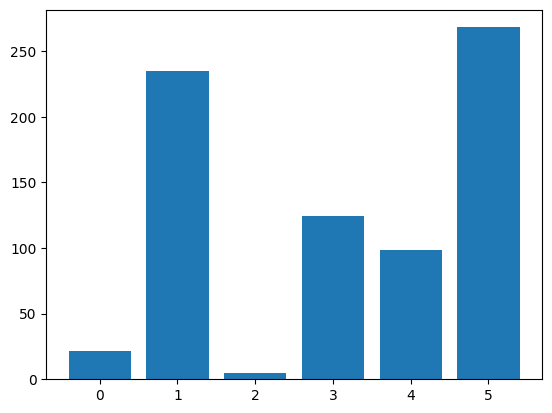

In [19]:
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Mutual Information

In [20]:
fs_mi = SelectKBest(score_func=mutual_info_classif, k='all')
fs_mi.fit(X_train, y_train)
X_train_fs_mi = fs.transform(X_train)
X_test_fs_mi = fs.transform(X_test)

Feature 0: 0.000745
Feature 1: 0.002436
Feature 2: 0.001483
Feature 3: 0.003241
Feature 4: 0.007513
Feature 5: 0.004981


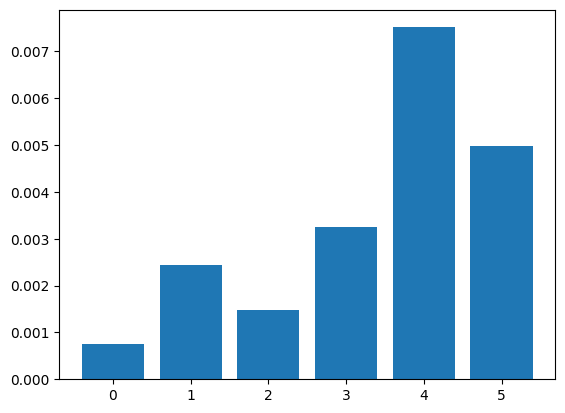

In [21]:
for i in range(len(fs_mi.scores_)):
 print('Feature %d: %f' % (i, fs_mi.scores_[i]))
pyplot.bar([i for i in range(len(fs_mi.scores_))], fs_mi.scores_)
pyplot.show()

# Train decision tree and gradient boosting on all features

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)

def evaluate(y_test, yhat):
  accuracy = accuracy_score(y_test, yhat)
  print('Accuracy: %.2f' % (accuracy*100))

  precision = precision_score(y_test, yhat)
  print('Precision: %.2f' % (precision*100))

  recall = recall_score(y_test, yhat)
  print('Recall: %.2f' % (recall*100))

  f1 = f1_score(y_test, yhat, average='macro')
  print('F1: %.2f' % (f1*100))

  print(confusion_matrix(y_test, yhat))

evaluate(y_test, yhat)

Accuracy: 93.53
Precision: 4.23
Recall: 9.38
F1: 51.24
[[1400   68]
 [  29    3]]


In [23]:
clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1.0,
    max_depth=3, random_state=0).fit(X_train, y_train)

yhat = clf.predict(X_test)
evaluate(y_test, yhat)

Accuracy: 97.40
Precision: 11.11
Recall: 3.12
F1: 51.78
[[1460    8]
 [  31    1]]


# Undersampling ant try decision tree, random forest and gradient boosting again

In [24]:
train_df_ = train_df[['C_UID', 'Origin', 'Destination', 'C_Time', 'C_Income', 'Label']]
train_df_class1 = train_df_.loc[train_df_['Label'] == 0]
train_df_class2 = train_df_.loc[train_df_['Label'] == 1]

train_df_undersampled = pd.concat([train_df_class1[:200], train_df_class2])
test_df_ = test_df[['C_UID', 'Origin', 'Destination', 'C_Time', 'C_Income', 'Label']]

train_df_undersampled

,C_UID,Origin,Destination,C_Time,C_Income,Label
0,1054,1030,1030,0,0,0
1,792,631,847,3,7,0
2,3380,858,864,2,8,0
4,1570,1018,1018,0,0,0
5,1145,845,592,0,3,0
...,...,...,...,...,...,...
8231,2174,619,861,1,2,1
8248,1650,858,858,0,0,1
8290,1761,1018,629,1,2,1
8358,2361,595,603,1,1,1


In [25]:
X_train = train_df_undersampled[['C_UID', 'Origin', 'Destination', 'C_Time', 'C_Income']]
X_test = test_df_[['C_UID', 'Origin', 'Destination', 'C_Time', 'C_Income']]

y_train = train_df_undersampled['Label']
y_test = test_df_['Label']

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)

evaluate(y_test, yhat)

Accuracy: 66.80
Precision: 2.83
Recall: 43.75
F1: 42.60
[[988 480]
 [ 18  14]]


In [27]:
rf = RandomForestClassifier(n_estimators = 50, verbose=2)
rf.fit(X_train, y_train)
yhat = rf.predict(X_test)

evaluate(y_test, yhat)

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


# Some feature selection tests

In [28]:
def select_features(X_train, y_train, X_test, score_func, k):
 fs = SelectKBest(score_func=score_func, k=k)
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs

In [29]:
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test, chi2, 4)

dt = RandomForestClassifier(n_estimators = 50, verbose=2)
dt.fit(X_train_fs, y_train)
yhat = dt.predict(X_test_fs)

evaluate(y_test, yhat)

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [30]:
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test, mutual_info_classif, 4)

dt = RandomForestClassifier()
dt.fit(X_train_fs, y_train)
yhat = dt.predict(X_test_fs)

evaluate(y_test, yhat)

Accuracy: 64.47
Precision: 3.70
Recall: 62.50
F1: 42.51
[[947 521]
 [ 12  20]]


In [31]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=3, random_state=0).fit(X_train_fs, y_train)

yhat = clf.predict(X_test_fs)

evaluate(y_test, yhat)

Accuracy: 65.33
Precision: 3.61
Recall: 59.38
F1: 42.76
[[961 507]
 [ 13  19]]


In [32]:
with open('gbc.pkl', 'wb') as f:
  pickle.dump(clf, f)

# Inference

In [33]:
import pickle

In [34]:
with open('gbc.pkl', 'rb') as f:
  clf = pickle.load(f)

In [35]:
clf.predict([[1,2,3,4]])

array([0])

In [42]:
X_test_fs[0]

array([3030, 1068,    6,   26])

In [43]:
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler

# tfidf and Naive bayes or SVM on comments

## TODO
### the preprocessing step should be added

In [46]:
train_df_txt = train_df[['Comment', 'Label']]
train_df_class1 = train_df_txt.loc[train_df_['Label'] == 0]
train_df_class2 = train_df_txt.loc[train_df_['Label'] == 1]

train_df_txt = pd.concat([train_df_class1[:200], train_df_class2])
test_df_txt = test_df[['Comment', 'Label']]

train_df_txt

,Comment,Label
0,\n,0
1,راننده بسیار مودب بود و خوشرو بود\n,0
2,سفر بسیار اسان و راحتی بود، و ماشین تمیزتمیز ...,0
4,ماشین بسیار شیک بود و راننده از هر لحاظ حرفه...,0
5,راننده با مهارت بالایی ترافیک شلوغ شهر را دور...,0
...,...,...
8231,ماشین خراب بود\n,1
8248,بهترین سفرم بود\n,1
8290,راننده عالی بود\n,1
8358,هیچ شکایتی ندارم، اما هیچ نظر مثبتی هم ندارم\n,1


In [53]:
corpus = train_df_txt['Comment'].to_list()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
y = train_df_txt['Label']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

evaluate(y_test, y_pred)

Number of mislabeled points out of a total 78 points : 31
Accuracy: 60.26
Precision: 55.56
Recall: 92.11
F1: 56.47
[[12 28]
 [ 3 35]]
